# `Import Necessary Libraries`

In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
%matplotlib inline

### `Checking Availablity of Devices`

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1587848605977776666
xla_global_id: -1
]


### `Split dataset`

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### `Display`

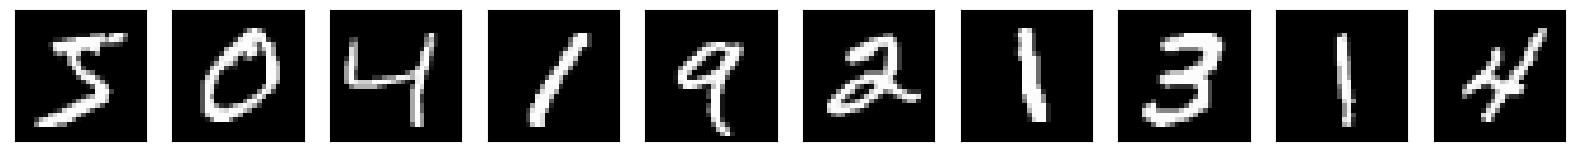

In [5]:
# Number of digit to display
n = 10

# Figure size
plt.figure(figsize=(20,4))

# Loop through images
for i in range(n):
    # Create a subplot with a figure
    ax = plt.subplot(2, n, i+1)
    
    # Display original image
    plt.imshow(x_train[i].reshape(28,28))
    
    #Set colormap to gray scale
    plt.gray()
    
    # Hide x-axis and y-axis
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with image
plt.show()
plt.close()

***`Display shapes of datasets`***

In [6]:
print(f"X-Train Shape {x_train.shape}")
print(f"Y-Train Shape {y_train.shape}")
print(f"X-Test Shape {x_test.shape}")
print(f"Y-Test Shape {y_test.shape}")

X-Train Shape (60000, 28, 28)
Y-Train Shape (60000,)
X-Test Shape (10000, 28, 28)
Y-Test Shape (10000,)


### `Reshaping Data`

In [7]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

### `Min-Max Scalling`

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### `One Hot Encoding`

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

***
#### `Display Update Shapes`
***

In [10]:
print(f"X-Train Shape {x_train.shape}")
print(f"Y-Train Shape {y_train.shape}")
print(f"X-Test Shape {x_test.shape}")
print(f"Y-Test Shape {y_test.shape}")

X-Train Shape (60000, 28, 28, 1)
Y-Train Shape (60000, 10)
X-Test Shape (10000, 28, 28, 1)
Y-Test Shape (10000, 10)


****
# `Building the CNN`
****

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [12]:
# Define the dimensions of the input image
img_rows, img_cols, channels = 28, 28, 1 # 1 for grayscale, 3 for rgb

# Define the number of filters for each layer of CNN
filters = [6, 32, 80, 120]

# Define the number of classes for classifications
classes = 10

*** 
## `Creating Model`
****

In [13]:
model = Sequential()
model.add(Conv2D(filters[0], (3,3), padding='same', activation='relu', input_shape=(img_rows,img_cols,channels)))
model.add(MaxPooling2D(pool_size=(2,2))) # For reducing image size
# (dim+pad-kernal)/2 (28 +3 -3)/2 = 14

model.add(Conv2D(filters[1], (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernal)/2 (14 +2 -2)/2 = 7

model.add(Conv2D(filters[2], (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernal)/2 (7 +2 -2)/2 = 3

model.add(Conv2D(filters[3], (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernal)/2 (3 +2 -2)/2 = 1

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

***
#### `Get a Summary Of Model`
***

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 80)         0

***
### `Parameter Calculation in CNN`
***

(filter_height * filter_width * input_channel + 1) * no_of_filter = parameters

* **Layer_1:** = (3x3x1+1)x6 = 60
* **Layer_2:** = (2x2x6+1)x32 = 800
* **Layer_3:** = (2x2x32+1)x80 = 10320

***
# `Training The CNN`
***

In [ ]:
model.fit(x_train,y_train,validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 [==============================] - 32s 41ms/step - loss: 2.2454 - accuracy: 0.3210 - val_loss: 2.0772 - val_accuracy: 0.5479
Epoch 2/15
750/750 [==============================] - 31s 41ms/step - loss: 0.9497 - accuracy: 0.7653 - val_loss: 0.3088 - val_accuracy: 0.9117
Epoch 3/15
750/750 [==============================] - 29s 38ms/step - loss: 0.2760 - accuracy: 0.9161 - val_loss: 0.1952 - val_accuracy: 0.9397
Epoch 4/15
750/750 [==============================] - 29s 38ms/step - loss: 0.1875 - accuracy: 0.9424 - val_loss: 0.1704 - val_accuracy: 0.9476
Epoch 5/15
750/750 [==============================] - 30s 40ms/step - loss: 0.1471 - accuracy: 0.9539 - val_loss: 0.1243 - val_accuracy: 0.9617
Epoch 6/15
750/750 [==============================] - 30s 40ms/step - loss: 0.1214 - accuracy: 0.9615 - val_loss: 0.1151 - val_accuracy: 0.9653
Epoch 7/15
750/750 [==============================] - 30s 39ms/step - loss: 0.1041 - accuracy: 0.9670 - val_loss: 0.0965 - val_accuracy:

***
## `Testing The Model`
***

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Prediction Probablity
y_pred_prob  = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_prob>0.5, 1, 0)

# Calculate and pring the score
test_accuracy = accuracy_score(y_pred,y_test)
print(f'Test Accuracy : {test_accuracy}')

# `Visculize`

In [ ]:
# Define a mask for seletcing a range of indices of 10 to 39
mask = range(10,40)

# Select 20 sample from test for visculization
x_valid = x_test[10:40]
actual_labels = y_test[10:40]

# Predict probability for the selected label
y_pred_prob_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_prob_valid > 0.5 , 1, 0)

In [ ]:
# Setup a figure to display image
n = len(x_valid)
plt.figure(figsize=(20,4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_valid[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display the predicted digit
    pred_digit = np.argmax(y_pred_prob_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(pred_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')
    
# Show the predicted image
plt.show()
    
# Close the plot
plt.close()